# Fields

Fields allow you to define an area where certain Scene Elements will appear randomly
This can be interesting in foraging scenario, where an agents move around to collect rewards.

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/usr/local/lib/python3.6/dist-packages/pymunk/libchipmunk.so]


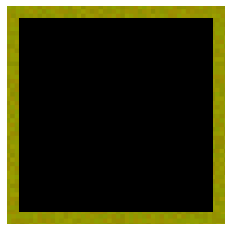

In [1]:
from simple_playgrounds.playgrounds import SingleRoom
from simple_playgrounds import Engine

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
my_playground = SingleRoom(size=(200, 200))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000, playground= my_playground, screen=False, replay=True)

plt_image(engine.generate_topdown_image(mode='plt'))

Now that we have an empty playground, lets create a field that produces candies in the top-left area of the playground.

In [2]:
from simple_playgrounds.entities.scene_elements import Candy
from simple_playgrounds.utils import PositionAreaSampler
from simple_playgrounds.entities.field import Field

area = PositionAreaSampler( center = (50, 150), area_shape='circle', radius= 30 )
field = Field(probability=0.1, limit=10, entity_produced=Candy, production_area=area)
my_playground.add_scene_element(field)

True

Now we can let the playground run for some time, and see if the field produces candies.

Run the following cell multiplt times.

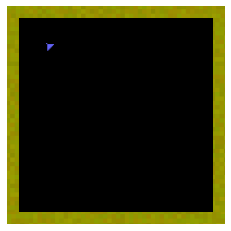

In [3]:
engine.run(steps = 10)

plt_image(engine.generate_topdown_image(mode='plt'))

In [4]:
engine.terminate()

Finally, we can add an agent controlled by a keyboard.
We see that the Candies are replaced little by little.

In [5]:
from simple_playgrounds.controllers import Keyboard
from simple_playgrounds.entities.agents import BaseAgent

from simple_playgrounds.entities.scene_elements import Candy
from simple_playgrounds.utils import PositionAreaSampler
from simple_playgrounds.entities.field import Field

my_playground = SingleRoom(size=(200, 200))
engine = Engine(time_limit=10000, playground= my_playground, screen=True, replay=True)

area = PositionAreaSampler( center = (100, 100), area_shape='circle', radius= 100 )
field = Field(probability=0.1, limit=10, entity_produced=Candy, production_area=area)
my_playground.add_scene_element(field)

my_agent = BaseAgent(controller=Keyboard())
my_playground.add_agent(my_agent)


engine.run(with_screen=True)
engine.terminate()


You probably noticed that the field stops producing after some time.
There is a total limit of total produced entities that can be set.